In [1]:
#importing required libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing sklearn libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

from numpy import interp
from itertools import cycle

In [2]:
#directory path for full dataset
imagedir ="/home/sanjeev/DL_POC/MlaImg_Data/Malimg_data/"

In [3]:
cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

Label: 0	Family:       Adialer.C	Number of images: 122
Label: 1	Family:       Agent.FYI	Number of images: 116
Label: 2	Family:       Allaple.A	Number of images: 2949
Label: 3	Family:       Allaple.L	Number of images: 1591
Label: 4	Family:   Alueron.gen!J	Number of images: 198
Label: 5	Family:       Autorun.K	Number of images: 106
Label: 6	Family:     C2LOP.gen!g	Number of images: 200
Label: 7	Family:         C2LOP.P	Number of images: 146
Label: 8	Family:  Dialplatform.B	Number of images: 177
Label: 9	Family:       Dontovo.A	Number of images: 162
Label:10	Family:        Fakerean	Number of images: 381
Label:11	Family:   Instantaccess	Number of images: 431
Label:12	Family:      Lolyda.AA1	Number of images: 213
Label:13	Family:      Lolyda.AA2	Number of images: 184
Label:14	Family:      Lolyda.AA3	Number of images: 123
Label:15	Family:       Lolyda.AT	Number of images: 159
Label:16	Family:     Malex.gen!J	Number of images: 136
Label:17	Family:   Obfuscator.AD	Number of images: 142
Label:18

In [4]:
vgg16 = np.load("/home/sanjeev/DL_Exp_Kajal/Finetune_stack_features/MalImg/vgg16_finetuned_feat_malimg_256.npy")
vgg19 = np.load("/home/sanjeev/DL_Exp_Kajal/Finetune_stack_features/MalImg/vgg19_feat_malimg_256.npy")
res = np.load("/home/sanjeev/DL_Exp_Kajal/Finetune_stack_features/MalImg/resnet50_feat_malimg_256.npy")
incv3 = np.load("/home/sanjeev/DL_Exp_Kajal/Finetune_stack_features/MalImg/inceptionV3_feat_malimg_256.npy")

In [5]:
X = []
for i in range(len(vgg16)):
    x = list(np.hstack((vgg16[i], vgg19[i], res[i], incv3[i])))
    X.append(x)

In [6]:
X =  np.array(X)
X.shape

(9339, 1024)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)

In [8]:
print("X_train shape =", X_train.shape)
print("X_test shape =", X_test.shape)
print("y_train shape =", y_train.shape)
print("y_test shape =", y_test.shape)

X_train shape = (7471, 1024)
X_test shape = (1868, 1024)
y_train shape = (7471,)
y_test shape = (1868,)


In [9]:
# randomizedsearch cv best params
# 'solver': 'adam', 'max_iter': 800, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,)

# randomizedsearch cv best score
# 0.98210

#best parameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate_init': 0.001, 'learning_rate': 'invscaling',
#                  'hidden_layer_sizes': (50,)}
#best score: 0.9815290593813379

In [10]:
params = dict(hidden_layer_sizes=[(50,), (100,), (150,), (200,)], solver=['adam', 'lbfgs', 'sgd'], 
              learning_rate=['constant', 'invscaling', 'adaptive'], learning_rate_init=[0.001, 0.01, 0.1], 
              max_iter=[500, 600, 700, 800])

In [11]:
#basic MLP classifier
mlp = MLPClassifier(random_state=31)

In [12]:
%%time
clf = RandomizedSearchCV(mlp, params)
search = clf.fit(X_train, y_train)

/home/sanjeev/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/sanjeev/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/sanjeev/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/sanjeev/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/sanjeev/an

CPU times: user 9h 41min 27s, sys: 9h 40min 42s, total: 19h 22min 10s
Wall time: 34min 59s


In [13]:
print("best parameters:", search.best_params_)
print("best score:", search.best_score_)

best parameters: {'solver': 'adam', 'max_iter': 600, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (150,)}
best score: 0.9812611426754957


In [ ]:
# best parameters: {'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 600, 'solver': 'adam'}
# best score: 0.9825996516724645

In [14]:
%%time
clf = MLPClassifier(hidden_layer_sizes=(150,), solver='adam', learning_rate='adaptive', learning_rate_init=0.01,
                    max_iter=600, random_state=31)
clf.fit(X_train, y_train)

CPU times: user 3min 16s, sys: 3min 32s, total: 6min 49s
Wall time: 12.4 s


MLPClassifier(hidden_layer_sizes=(150,), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=600, random_state=31)

In [15]:
print("Training Accuracy:", round((clf.score(X_train, y_train) * 100), 2))

Training Accuracy: 100.0


In [16]:
print("Testing Accuracy:", round((clf.score(X_test, y_test) * 100), 2))

Testing Accuracy: 98.39


In [17]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 488 ms, sys: 381 ms, total: 869 ms
Wall time: 27.2 ms


In [30]:
%%time
ls = precision_recall_fscore_support(y_test, y_pred, average='micro')
print(int(round(ls[0]*100, 0)), int(round(ls[1]*100, 0)), int(round(ls[2]*100, 0)))

98 98 98
CPU times: user 9.02 ms, sys: 9.04 ms, total: 18.1 ms
Wall time: 16.4 ms


In [19]:
%%time
score = cross_val_score(clf, X, y, cv=5)
round(np.mean(score)*100, 2)

CPU times: user 17min 43s, sys: 19min 22s, total: 37min 6s
Wall time: 1min 3s


98.29

Plotting the confusion matrix


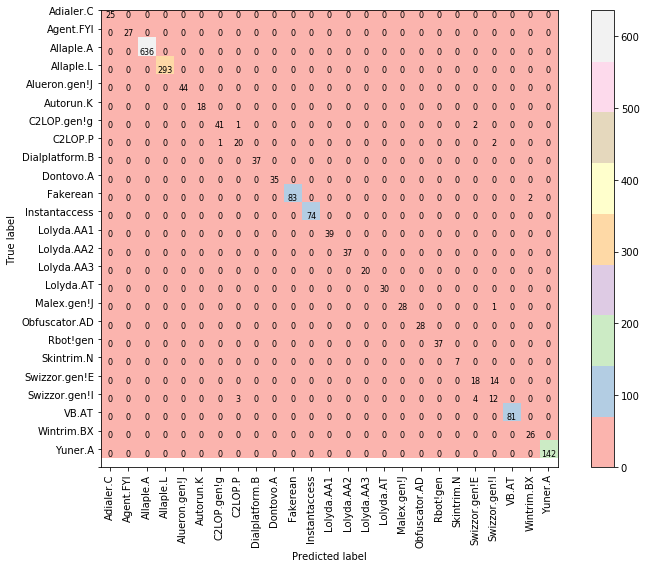

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Plotting the confusion matrix")
conf_mat = np.around(conf_matrix, decimals=2)  
figure = plt.gcf()
figure.set_size_inches(10, 8)
plt.imshow(conf_mat, interpolation='nearest', cmap='Pastel1')

for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col,row), ha='center', va='top', fontsize=8)
        
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=10)
plt.yticks(range(len(list_fams)+1), list_fams, fontsize=10)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.colorbar()
# plt.savefig("/home/sanjeev/DL_Exp_Kajal/Finetune_stack_features/Plots/256/mlp_cm_rf.eps", bbox_inches='tight')
# plt.savefig("/home/sanjeev/DL_Exp_Kajal/Finetune_stack_features/Plots/256/mlp_cm_rf.png", bbox_inches='tight')

plt.show()

In [21]:
classification_metrices = metrics.classification_report(y_test, y_pred, target_names=list_fams)
print(classification_metrices)

                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        25
     Agent.FYI       1.00      1.00      1.00        27
     Allaple.A       1.00      1.00      1.00       636
     Allaple.L       1.00      1.00      1.00       293
 Alueron.gen!J       1.00      1.00      1.00        44
     Autorun.K       1.00      1.00      1.00        18
   C2LOP.gen!g       0.98      0.93      0.95        44
       C2LOP.P       0.83      0.87      0.85        23
Dialplatform.B       1.00      1.00      1.00        37
     Dontovo.A       1.00      1.00      1.00        35
      Fakerean       1.00      0.98      0.99        85
 Instantaccess       1.00      1.00      1.00        74
    Lolyda.AA1       1.00      1.00      1.00        39
    Lolyda.AA2       1.00      1.00      1.00        37
    Lolyda.AA3       1.00      1.00      1.00        20
     Lolyda.AT       1.00      1.00      1.00        30
   Malex.gen!J       1.00      0.97      0.98  

In [22]:
# classification_metrices = metrics.classification_report(y_test, y_pred, output_dict=True, target_names= list_fams)
# df = pd.DataFrame(classification_metrices).transpose()
# df.to_csv('/home/sanjeev/DL_Exp_Kajal/Finetune_stack_features/Plots/256/mlp_cr_rf.csv')

In [23]:
print("micro_precision :", metrics.precision_score(y_test, y_pred, average='micro'))
print("micro_recall :", metrics.recall_score(y_test, y_pred, average='micro'))
print("micro_f1_score :", metrics.f1_score(y_test, y_pred, average='micro'))

micro_precision : 0.9839400428265525
micro_recall : 0.9839400428265525
micro_f1_score : 0.9839400428265525


In [24]:
print("macro_precision :", metrics.precision_score(y_test, y_pred, average='macro'))
print("macro_recall :", metrics.recall_score(y_test, y_pred, average='macro'))
print("macro_f1_score :", metrics.f1_score(y_test, y_pred, average='macro'))

macro_precision : 0.9560755336617406
macro_recall : 0.9574980070477005
macro_f1_score : 0.9552369474458591


In [25]:
print("weighted_precision :", metrics.precision_score(y_test, y_pred, average='weighted'))
print("weighted_recall :", metrics.recall_score(y_test, y_pred, average='weighted'))
print("weighted_f1_score :", metrics.f1_score(y_test, y_pred, average='weighted'))

weighted_precision : 0.9861477375414465
weighted_recall : 0.9839400428265525
weighted_f1_score : 0.9845373369239484


In [26]:
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))  
y_test = enc.transform(y_test.reshape(-1, 1))
y_pred = enc.transform(y_pred.reshape(-1, 1))

In [27]:
y_test = y_test.toarray()
y_pred = y_pred.toarray()

In [28]:
n_classes = 25

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

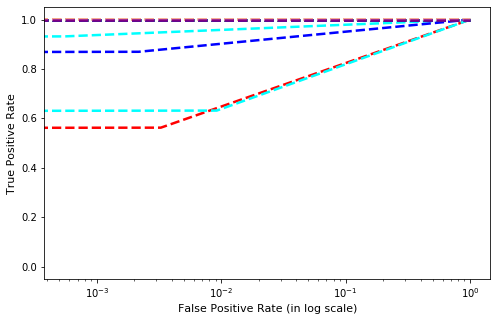

In [29]:
# Compute macro-average ROC curve and ROC area
n_classes = 25
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2.5   # line width
plt.figure(figsize=(8,5))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen', 'green', 'red', 'cyan', 'blue', 
                 'pink', 'purple', 'brown', 'coral', 'chocolate', 'indigo', 'navy'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linestyle='dashed', lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xscale("log")
plt.xlabel('False Positive Rate (in log scale)', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
# plt.savefig("/home/sanjeev/DL_Exp_Kajal/Finetune_stack_features/Plots/256/mlp_roc_rf.eps", bbox_inches='tight')
# plt.savefig("/home/sanjeev/DL_Exp_Kajal/Finetune_stack_features/Plots/256/mlp_roc_rf.png", bbox_inches='tight')

plt.show()